In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import json
import csv
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Part 1 

In [2]:
#loading the data set 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#describing the data set
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#reading the rtf file 
with open('algoparams_from_ui.json.rtf', 'r') as file:
    text = file.read()
print(text)

{\rtf1\adeflang1025\ansi\ansicpg1252\uc1\adeff31507\deff0\stshfdbch31506\stshfloch31506\stshfhich31506\stshfbi31507\deflang1033\deflangfe1033\themelang1033\themelangfe0\themelangcs0{\fonttbl{\f2\fbidi \fmodern\fcharset0\fprq1{\*\panose 02070309020205020404}Courier New;}{\f34\fbidi \froman\fcharset0\fprq2{\*\panose 02040503050406030204}Cambria Math;}
{\f37\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0502020204030204}Calibri;}{\f43\fbidi \fmodern\fcharset0\fprq1{\*\panose 020b0609020204030204}Consolas;}{\flomajor\f31500\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}
{\fdbmajor\f31501\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\fhimajor\f31502\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0302020204030204}Calibri Light;}
{\fbimajor\f31503\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\flominor\f31504\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}
{\fdbminor\f3

In [6]:
#converting iris csv to json file 
Json = df.to_json(orient='records')
print(Json)

[{"sepal_length":5.1,"sepal_width":3.5,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":4.9,"sepal_width":3.0,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":4.7,"sepal_width":3.2,"petal_length":1.3,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":4.6,"sepal_width":3.1,"petal_length":1.5,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":5.0,"sepal_width":3.6,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":5.4,"sepal_width":3.9,"petal_length":1.7,"petal_width":0.4,"species":"Iris-setosa"},{"sepal_length":4.6,"sepal_width":3.4,"petal_length":1.4,"petal_width":0.3,"species":"Iris-setosa"},{"sepal_length":5.0,"sepal_width":3.4,"petal_length":1.5,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":4.4,"sepal_width":2.9,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},{"sepal_length":4.9,"sepal_width":3.1,"petal_length":1.5,"petal_width":0.1,"species":"Iris-setosa"}

In [7]:
#converting csv to a JSON string or file. 
print(df.to_json(orient ='split'))

{"columns":["sepal_length","sepal_width","petal_length","petal_width","species"],"index":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149],"data":[[5.1,3.5,1.4,0.2,"Iris-setosa"],[4.9,3.0,1.4,0.2,"Iris-setosa"],[4.7,3.2,1.3,0.2,"Iris-setosa"],[4.6,3.1,1.5,0.2,"Iris-setosa"],[5.0,3.6,1.4,0.2,"Iris-setosa"],[5.4,3.9,1.7,0.4,"Iris-setosa"],[4.6,3.4,1.4,0.3,"Iris-setosa"],[5.0,3.4,1.5,0.2,"Iris-setosa"],[4.4,2.9,1.4,0.2,"Iris-setosa"],[4.9,3.1,1.5,0.1,"Iris-setosa"],[5.4,3.7,1.5,0.2,"Iris-setosa"],[4.8,3.4,1.6,0.2,"Iris-setosa"],[4.8,3.0,1.4,0.1,"Iris-seto

In [8]:
# index labels as the keys and the row data as the values.
print(df.to_json(orient ='index'))

{"0":{"sepal_length":5.1,"sepal_width":3.5,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},"1":{"sepal_length":4.9,"sepal_width":3.0,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},"2":{"sepal_length":4.7,"sepal_width":3.2,"petal_length":1.3,"petal_width":0.2,"species":"Iris-setosa"},"3":{"sepal_length":4.6,"sepal_width":3.1,"petal_length":1.5,"petal_width":0.2,"species":"Iris-setosa"},"4":{"sepal_length":5.0,"sepal_width":3.6,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},"5":{"sepal_length":5.4,"sepal_width":3.9,"petal_length":1.7,"petal_width":0.4,"species":"Iris-setosa"},"6":{"sepal_length":4.6,"sepal_width":3.4,"petal_length":1.4,"petal_width":0.3,"species":"Iris-setosa"},"7":{"sepal_length":5.0,"sepal_width":3.4,"petal_length":1.5,"petal_width":0.2,"species":"Iris-setosa"},"8":{"sepal_length":4.4,"sepal_width":2.9,"petal_length":1.4,"petal_width":0.2,"species":"Iris-setosa"},"9":{"sepal_length":4.9,"sepal_width":3.1,"petal_length":1.5,"p

In [9]:
#saving the json file in local system with the name output
json_output = ("output.json")
output = df.to_json(json_output, orient = 'records', indent = 1)

In [10]:
# PARSING THE  JSON FILE
# Open JSON file
with open('output.json', 'r') as f:
    # Load JSON data
    df2 = json.load(f)

# Parse JSON data
for item in df2:
    # Access individual items
    sepal_length = item['sepal_length']
    sepal_width = item['sepal_width']
    petal_length = item['petal_length']
    petal_width = item['petal_width']
    species = item['species']

    # Do something with the items
    print(f'Sepal length: {sepal_length}, Sepal width: {sepal_width}, Petal length: {petal_length}, Petal width: {petal_width}, species: {species}')


Sepal length: 5.1, Sepal width: 3.5, Petal length: 1.4, Petal width: 0.2, species: Iris-setosa
Sepal length: 4.9, Sepal width: 3.0, Petal length: 1.4, Petal width: 0.2, species: Iris-setosa
Sepal length: 4.7, Sepal width: 3.2, Petal length: 1.3, Petal width: 0.2, species: Iris-setosa
Sepal length: 4.6, Sepal width: 3.1, Petal length: 1.5, Petal width: 0.2, species: Iris-setosa
Sepal length: 5.0, Sepal width: 3.6, Petal length: 1.4, Petal width: 0.2, species: Iris-setosa
Sepal length: 5.4, Sepal width: 3.9, Petal length: 1.7, Petal width: 0.4, species: Iris-setosa
Sepal length: 4.6, Sepal width: 3.4, Petal length: 1.4, Petal width: 0.3, species: Iris-setosa
Sepal length: 5.0, Sepal width: 3.4, Petal length: 1.5, Petal width: 0.2, species: Iris-setosa
Sepal length: 4.4, Sepal width: 2.9, Petal length: 1.4, Petal width: 0.2, species: Iris-setosa
Sepal length: 4.9, Sepal width: 3.1, Petal length: 1.5, Petal width: 0.1, species: Iris-setosa
Sepal length: 5.4, Sepal width: 3.7, Petal length:

# Part 2

In [11]:
#checking for missing values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# Load the JSON file
with open('output.json') as f:
    data = json.load(f)

# Convert the data to a JSON string
json_string = json.dumps(data)

# Print the JSON string
print(json_string)

[{"sepal_length": 5.1, "sepal_width": 3.5, "petal_length": 1.4, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 4.9, "sepal_width": 3.0, "petal_length": 1.4, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 4.7, "sepal_width": 3.2, "petal_length": 1.3, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 4.6, "sepal_width": 3.1, "petal_length": 1.5, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 5.0, "sepal_width": 3.6, "petal_length": 1.4, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 5.4, "sepal_width": 3.9, "petal_length": 1.7, "petal_width": 0.4, "species": "Iris-setosa"}, {"sepal_length": 4.6, "sepal_width": 3.4, "petal_length": 1.4, "petal_width": 0.3, "species": "Iris-setosa"}, {"sepal_length": 5.0, "sepal_width": 3.4, "petal_length": 1.5, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_length": 4.4, "sepal_width": 2.9, "petal_length": 1.4, "petal_width": 0.2, "species": "Iris-setosa"}, {"sepal_l

# Part 3

In [13]:
# label encoding the target variable 
label_encoder=LabelEncoder()
df["species"]=label_encoder.fit_transform(df["species"])
print(df.head(10))
print("\n")
print(df["species"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
5           5.4          3.9           1.7          0.4        0
6           4.6          3.4           1.4          0.3        0
7           5.0          3.4           1.5          0.2        0
8           4.4          2.9           1.4          0.2        0
9           4.9          3.1           1.5          0.1        0


0    50
1    50
2    50
Name: species, dtype: int64


In [14]:
# Calculate the correlation between the features and the target variable


# Separate the features and the target variable
X = df.drop('species', axis=1)
y = df['species']

# Calculate the correlation
corr = X.corrwith(y)

# Print the correlation
print(corr)


sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
dtype: float64


In [15]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df, df['species'], test_size=0.2, random_state=0)


In [16]:
# Perform PCA to reduce the dimensionality of the input data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_pca, Y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
# Predict the classes for the testing set using the decision tree classifier
Y_pred_tree = tree.predict(X_test_pca)

In [19]:
# Calculate the accuracy of the decision tree classifier
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
print("Accuracy of decision tree classifier: {:.2f}%".format(accuracy_tree * 100))

Accuracy of decision tree classifier: 96.67%


In [20]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, df.species, test_size=0.2, random_state=0)

In [21]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

In [22]:
# Train the classifier on the training set
rfc.fit(X_train, Y_train)

# Predict the classes of the testing set
Y_pred = rfc.predict(X_test)

In [23]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# Part 4

In [24]:
#make the model objects (using sklean) that can handle what is required in the “prediction_type” specified
# Determine prediction type from dataframe columns
if 'species' in df.columns:
    # Classification problem
    prediction_type = 'classification'
else:
    # Regression problem
    prediction_type = 'regression'

# Create model object based on prediction type
if prediction_type == 'regression':
    model = LinearRegression()
elif prediction_type == 'classification':
    model = LogisticRegression()
    # If more than two classes, use a multi-class classifier such as:
    # model = RandomForestClassifier()
else:
    raise ValueError(f'Invalid prediction type: {prediction_type}')

# Split data into inputs and outputs
X = df.drop('species', axis=1)
Y = df['species']

# Train model using data
model.fit(X, Y)

LogisticRegression()

In [25]:
# label encoding the target variable 
label_encoder=LabelEncoder()
df["species"]=label_encoder.fit_transform(df["species"])
print(df.head(10))
print("\n")
print(df["species"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
5           5.4          3.9           1.7          0.4        0
6           4.6          3.4           1.4          0.3        0
7           5.0          3.4           1.5          0.2        0
8           4.4          2.9           1.4          0.2        0
9           4.9          3.1           1.5          0.1        0


0    50
1    50
2    50
Name: species, dtype: int64


<AxesSubplot:>

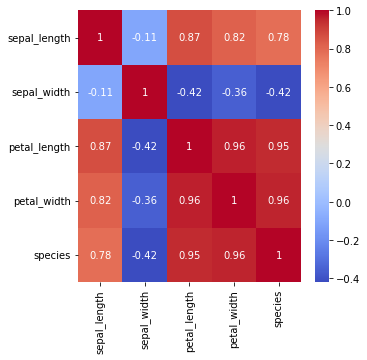

In [26]:
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot = True, cmap='coolwarm')

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  100.0


C:\Users\DELL\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 4 

In [29]:
# Use train_test_split and manually tune parameters by trial and error
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(df, df.species, test_size=0.3)
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [30]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(df, df.species)
clf.cv_results_

{'mean_fit_time': array([0.00220137, 0.00200067, 0.00160346, 0.00139604, 0.00179505,
        0.00140419]),
 'std_fit_time': array([0.00039591, 0.00063238, 0.00047875, 0.00048844, 0.00074629,
        0.00048288]),
 'mean_score_time': array([0.00158815, 0.00159593, 0.00079932, 0.00188193, 0.00119686,
        0.00079775]),
 'std_score_time': array([0.00048282, 0.00048838, 0.00039967, 0.0007992 , 0.00039911,
        0.00039887]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [31]:
df2 = pd.DataFrame(clf.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002201,0.000396,0.001588,0.000483,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.002001,0.000632,0.001596,0.000488,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.001603,0.000479,0.000799,0.000400,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.001396,0.000488,0.001882,0.000799,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.001795,0.000746,0.001197,0.000399,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.001404,0.000483,0.000798,0.000399,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [32]:
df2[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,1.0
1,1,linear,1.0
2,10,rbf,1.0
3,10,linear,1.0
4,20,rbf,1.0
5,20,linear,1.0


In [33]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [34]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

How about different models with different hyperparameters?

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(df, df.species)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,1.0
1,1,rbf,1.0


In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [37]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df, df.species)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,1.0,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,1.0,{'n_estimators': 10}
2,logistic_regression,1.0,{'C': 1}


Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification